In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt 

D:\Anaconda\envs\py3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
boston_housing = keras.datasets.boston_housing
(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data()

In [3]:
type(train_labels)

numpy.ndarray

In [4]:
train_labels.shape

(404,)

In [5]:
order = np.argsort(np.random.random(train_labels.shape))

In [6]:
train_data = train_data[order]
train_labels=train_labels[order]

In [7]:
train_data.shape

(404, 13)

In [8]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [9]:
train_data.mean(axis=0)

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std

In [12]:
train_data.shape

(404, 13)

In [13]:
train_data[0][1]

1.4120570734061417

In [14]:
for i in range(404):
    print(train_data[i][0])

-0.39725269012306935
0.08784634211423262
-0.39537930672763144
-0.40375914893718423
-0.34869207877735736
-0.1480656108578292
-0.39100410594638313
-0.3983221114135825
-0.38700704906623834
-0.39141583856076506
1.718874169164998
-0.3244941196273778
-0.404288983801481
-0.3346368275306133
0.23045535063982323
-0.37966954047519985
-0.3933986561510782
0.12494020014940715
1.3126891100083975
-0.3828973074705784
-0.37130053333444657
-0.3638156678077346
-0.3901004612085028
-0.4026442203577131
-0.39975992504327945
0.03817080218904958
-0.38960638207124443
-0.402052625601259
0.6585965932117812
0.4254833385106367
-0.3872356690179083
2.1565134330466194
1.1017411555504417
-0.39997770992614995
-0.38258850800979194
0.11816286461530416
0.6339164735002228
-0.313466186603221
-0.39207894477129607
-0.16282405806966244
0.7029672834527169
-0.4003428517446939
-0.3395245270660791
-0.39849980654189465
-0.14068584549847257
-0.39423620696928147
-0.32203130848924566
-0.40182075512894916
-0.368827970634395
-0.3453494600

In [15]:
df.mean()

CRIM         3.745111
ZN          11.480198
INDUS       11.104431
CHAS         0.061881
NOX          0.557356
RM           6.267082
AGE         69.010644
DIS          3.740271
RAD          9.440594
TAX        405.898515
PTRATIO     18.475990
B          354.783168
LSTAT       12.740817
dtype: float64

In [16]:
df = (df-df.mean())/df.std()

In [17]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396761,1.410308,-1.125251,-0.256515,-1.026113,0.725454,-0.998926,0.023805,-0.510509,-0.047474,-1.488828,0.415326,-0.835451
1,0.087738,-0.483017,1.027052,-0.256515,1.369595,-3.812523,0.676053,-1.047707,1.673810,1.563349,0.783505,-0.000884,-0.774799
2,-0.394890,1.199939,-0.689211,-0.256515,-0.940856,0.826893,-0.938082,0.259593,-0.625474,-0.912991,-0.398108,0.447522,-1.345476
3,-0.403259,3.093264,-1.021013,-0.256515,-1.094318,0.350694,-1.478513,2.361834,-0.625474,-0.329969,-0.261768,0.400025,-0.879561
4,-0.348260,-0.483017,-0.720042,-0.256515,-0.454894,3.462893,0.500681,-0.416641,-0.165617,-0.594433,-0.489002,0.289199,-1.118032


In [18]:
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [19]:
model = Sequential()
model.add(Dense(64,input_dim=13,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [20]:
optimizer = tf.train.RMSPropOptimizer(0.001)
model.compile(optimizer=optimizer,loss='mse',metrics=['mse'])

In [21]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100 ==0:
            print('')
        print('.',end='')
EPOCHS = 500

#history = model.fit(train_data,train_labels,epochs=EPOCHS,validation_split=0.2,verbose = 1,callbacks=[PrintDot()])

his = history.history

his.keys()

In [22]:
def showgram(history):
    his = history.history
    loss = his['loss']
    val_loss = his['val_loss']
    val_error = his['val_mean_squared_error']
    error = his['mean_squared_error']
    epoch = history.epoch
    plt.xlabel = 'EPOCHS'
    plt.ylabel = 'RES'
    plt.figure(figsize=(20,8))
    plt.title('DADA')
    plt.plot(epoch,loss,marker='.',label = 'loss')
    plt.plot(epoch,val_loss,marker='>',label='val_loss')
  #  plt.plot(epoch,val_error,marker='H',label='val_error')
   # plt.plot(epoch,error,marker='*',label='error')
    plt.legend()

showgram(his)

In [23]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)
history = model.fit(train_data,train_labels,epochs=EPOCHS,validation_split=0.2,callbacks=[PrintDot(),early_stop],verbose=2)

Train on 323 samples, validate on 81 samples
Epoch 1/500
 - 0s - loss: 538.4893 - mean_squared_error: 538.4893 - val_loss: 552.2372 - val_mean_squared_error: 552.2372

.Epoch 2/500
 - 0s - loss: 486.5509 - mean_squared_error: 486.5509 - val_loss: 489.9527 - val_mean_squared_error: 489.9527
.Epoch 3/500
 - 0s - loss: 426.2993 - mean_squared_error: 426.2993 - val_loss: 422.6825 - val_mean_squared_error: 422.6825
.Epoch 4/500
 - 0s - loss: 358.3308 - mean_squared_error: 358.3308 - val_loss: 337.7400 - val_mean_squared_error: 337.7400
.Epoch 5/500
 - 0s - loss: 281.1250 - mean_squared_error: 281.1250 - val_loss: 249.9398 - val_mean_squared_error: 249.9398
.Epoch 6/500
 - 0s - loss: 205.5616 - mean_squared_error: 205.5616 - val_loss: 177.6143 - val_mean_squared_error: 177.6143
.Epoch 7/500
 - 0s - loss: 142.8782 - mean_squared_error: 142.8782 - val_loss: 116.3073 - val_mean_squared_error: 116.3073
.Epoch 8/500
 - 0s - loss: 96.2402 - mean_squared_error: 96.2402 - val_loss: 79.4534 - val_mea

.Epoch 70/500
 - 0s - loss: 6.7673 - mean_squared_error: 6.7673 - val_loss: 16.2052 - val_mean_squared_error: 16.2052
.Epoch 71/500
 - 0s - loss: 6.6780 - mean_squared_error: 6.6780 - val_loss: 16.8287 - val_mean_squared_error: 16.8287
.Epoch 72/500
 - 0s - loss: 6.6014 - mean_squared_error: 6.6014 - val_loss: 16.1632 - val_mean_squared_error: 16.1632
.Epoch 73/500
 - 0s - loss: 6.4951 - mean_squared_error: 6.4951 - val_loss: 16.1848 - val_mean_squared_error: 16.1848
.Epoch 74/500
 - 0s - loss: 6.4223 - mean_squared_error: 6.4223 - val_loss: 16.4037 - val_mean_squared_error: 16.4037
.Epoch 75/500
 - 0s - loss: 6.6742 - mean_squared_error: 6.6742 - val_loss: 15.8923 - val_mean_squared_error: 15.8923
.Epoch 76/500
 - 0s - loss: 6.4866 - mean_squared_error: 6.4866 - val_loss: 17.2131 - val_mean_squared_error: 17.2131
.Epoch 77/500
 - 0s - loss: 6.3505 - mean_squared_error: 6.3505 - val_loss: 16.0508 - val_mean_squared_error: 16.0508
.Epoch 78/500
 - 0s - loss: 6.2790 - mean_squared_error:

.Epoch 140/500
 - 0s - loss: 4.5453 - mean_squared_error: 4.5453 - val_loss: 15.9558 - val_mean_squared_error: 15.9558
.Epoch 141/500
 - 0s - loss: 4.5547 - mean_squared_error: 4.5547 - val_loss: 14.2368 - val_mean_squared_error: 14.2368
.Epoch 142/500
 - 0s - loss: 4.4727 - mean_squared_error: 4.4727 - val_loss: 15.8535 - val_mean_squared_error: 15.8535
.Epoch 143/500
 - 0s - loss: 4.3534 - mean_squared_error: 4.3534 - val_loss: 14.4180 - val_mean_squared_error: 14.4180
.Epoch 144/500
 - 0s - loss: 4.6641 - mean_squared_error: 4.6641 - val_loss: 14.3602 - val_mean_squared_error: 14.3602
.Epoch 145/500
 - 0s - loss: 4.3293 - mean_squared_error: 4.3293 - val_loss: 14.5825 - val_mean_squared_error: 14.5825
.Epoch 146/500
 - 0s - loss: 4.5071 - mean_squared_error: 4.5071 - val_loss: 14.6691 - val_mean_squared_error: 14.6691
.Epoch 147/500
 - 0s - loss: 4.3160 - mean_squared_error: 4.3160 - val_loss: 16.1369 - val_mean_squared_error: 16.1369
.Epoch 148/500
 - 0s - loss: 4.4391 - mean_squar

In [24]:
his = history.history

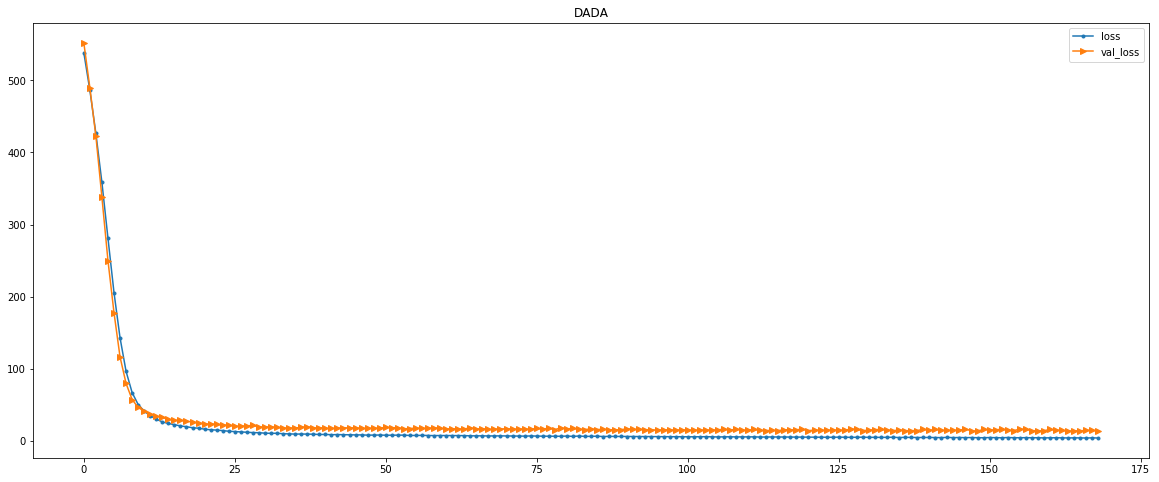

In [25]:
showgram(history)

In [26]:
[loss,mae] = model.evaluate(test_data,test_labels,verbose=0)

In [27]:
mae*1000

21413.864883722046

(6.470076256766751, 49.96217662714438)

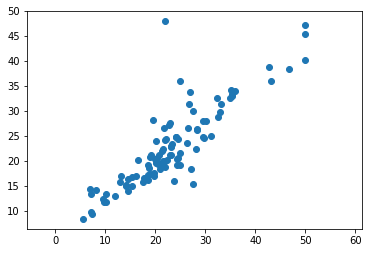

In [30]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)

plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

(array([ 1.,  0.,  0.,  1.,  2.,  1.,  1.,  1.,  2.,  4.,  3.,  4., 12.,
        14.,  4., 10., 10.,  4.,  8.,  5.,  3.,  3.,  2.,  2.,  1.,  1.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-12.0860033 , -11.32285392, -10.55970453,  -9.79655514,
         -9.03340575,  -8.27025637,  -7.50710698,  -6.74395759,
         -5.9808082 ,  -5.21765882,  -4.45450943,  -3.69136004,
         -2.92821066,  -2.16506127,  -1.40191188,  -0.63876249,
          0.12438689,   0.88753628,   1.65068567,   2.41383506,
          3.17698444,   3.94013383,   4.70328322,   5.46643261,
          6.22958199,   6.99273138,   7.75588077,   8.51903016,
          9.28217954,  10.04532893,  10.80847832,  11.5716277 ,
         12.33477709,  13.09792648,  13.86107587,  14.62422525,
         15.38737464,  16.15052403,  16.91367342,  17.6768228 ,
         18.43997219,  19.20312158,  19.96627097,  20.72942035,
         21.

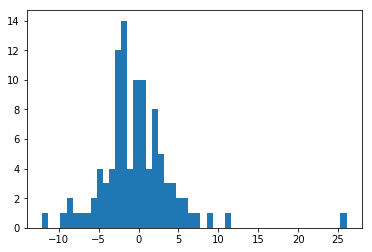

In [29]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
